In [2]:
import torch

In [4]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
x.shape

torch.Size([12])

In [6]:
x.numel()#元素种数

12

In [8]:
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [9]:
torch.zeros(2,3,4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [11]:
torch.ones(2,3,4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [14]:
torch.tensor([[[2,1,3,4],[1,2,3,4],[4,3,2,1]]]).shape

torch.Size([1, 3, 4])

In [15]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x + y, x - y, x * y, x / y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [16]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [18]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2,1,3,4],[1,2,3,4],[4,3,2,1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  3.,  4.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  3.,  4.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [19]:
X == Y

tensor([[False,  True, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [20]:
X.sum()

tensor(66.)

In [21]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

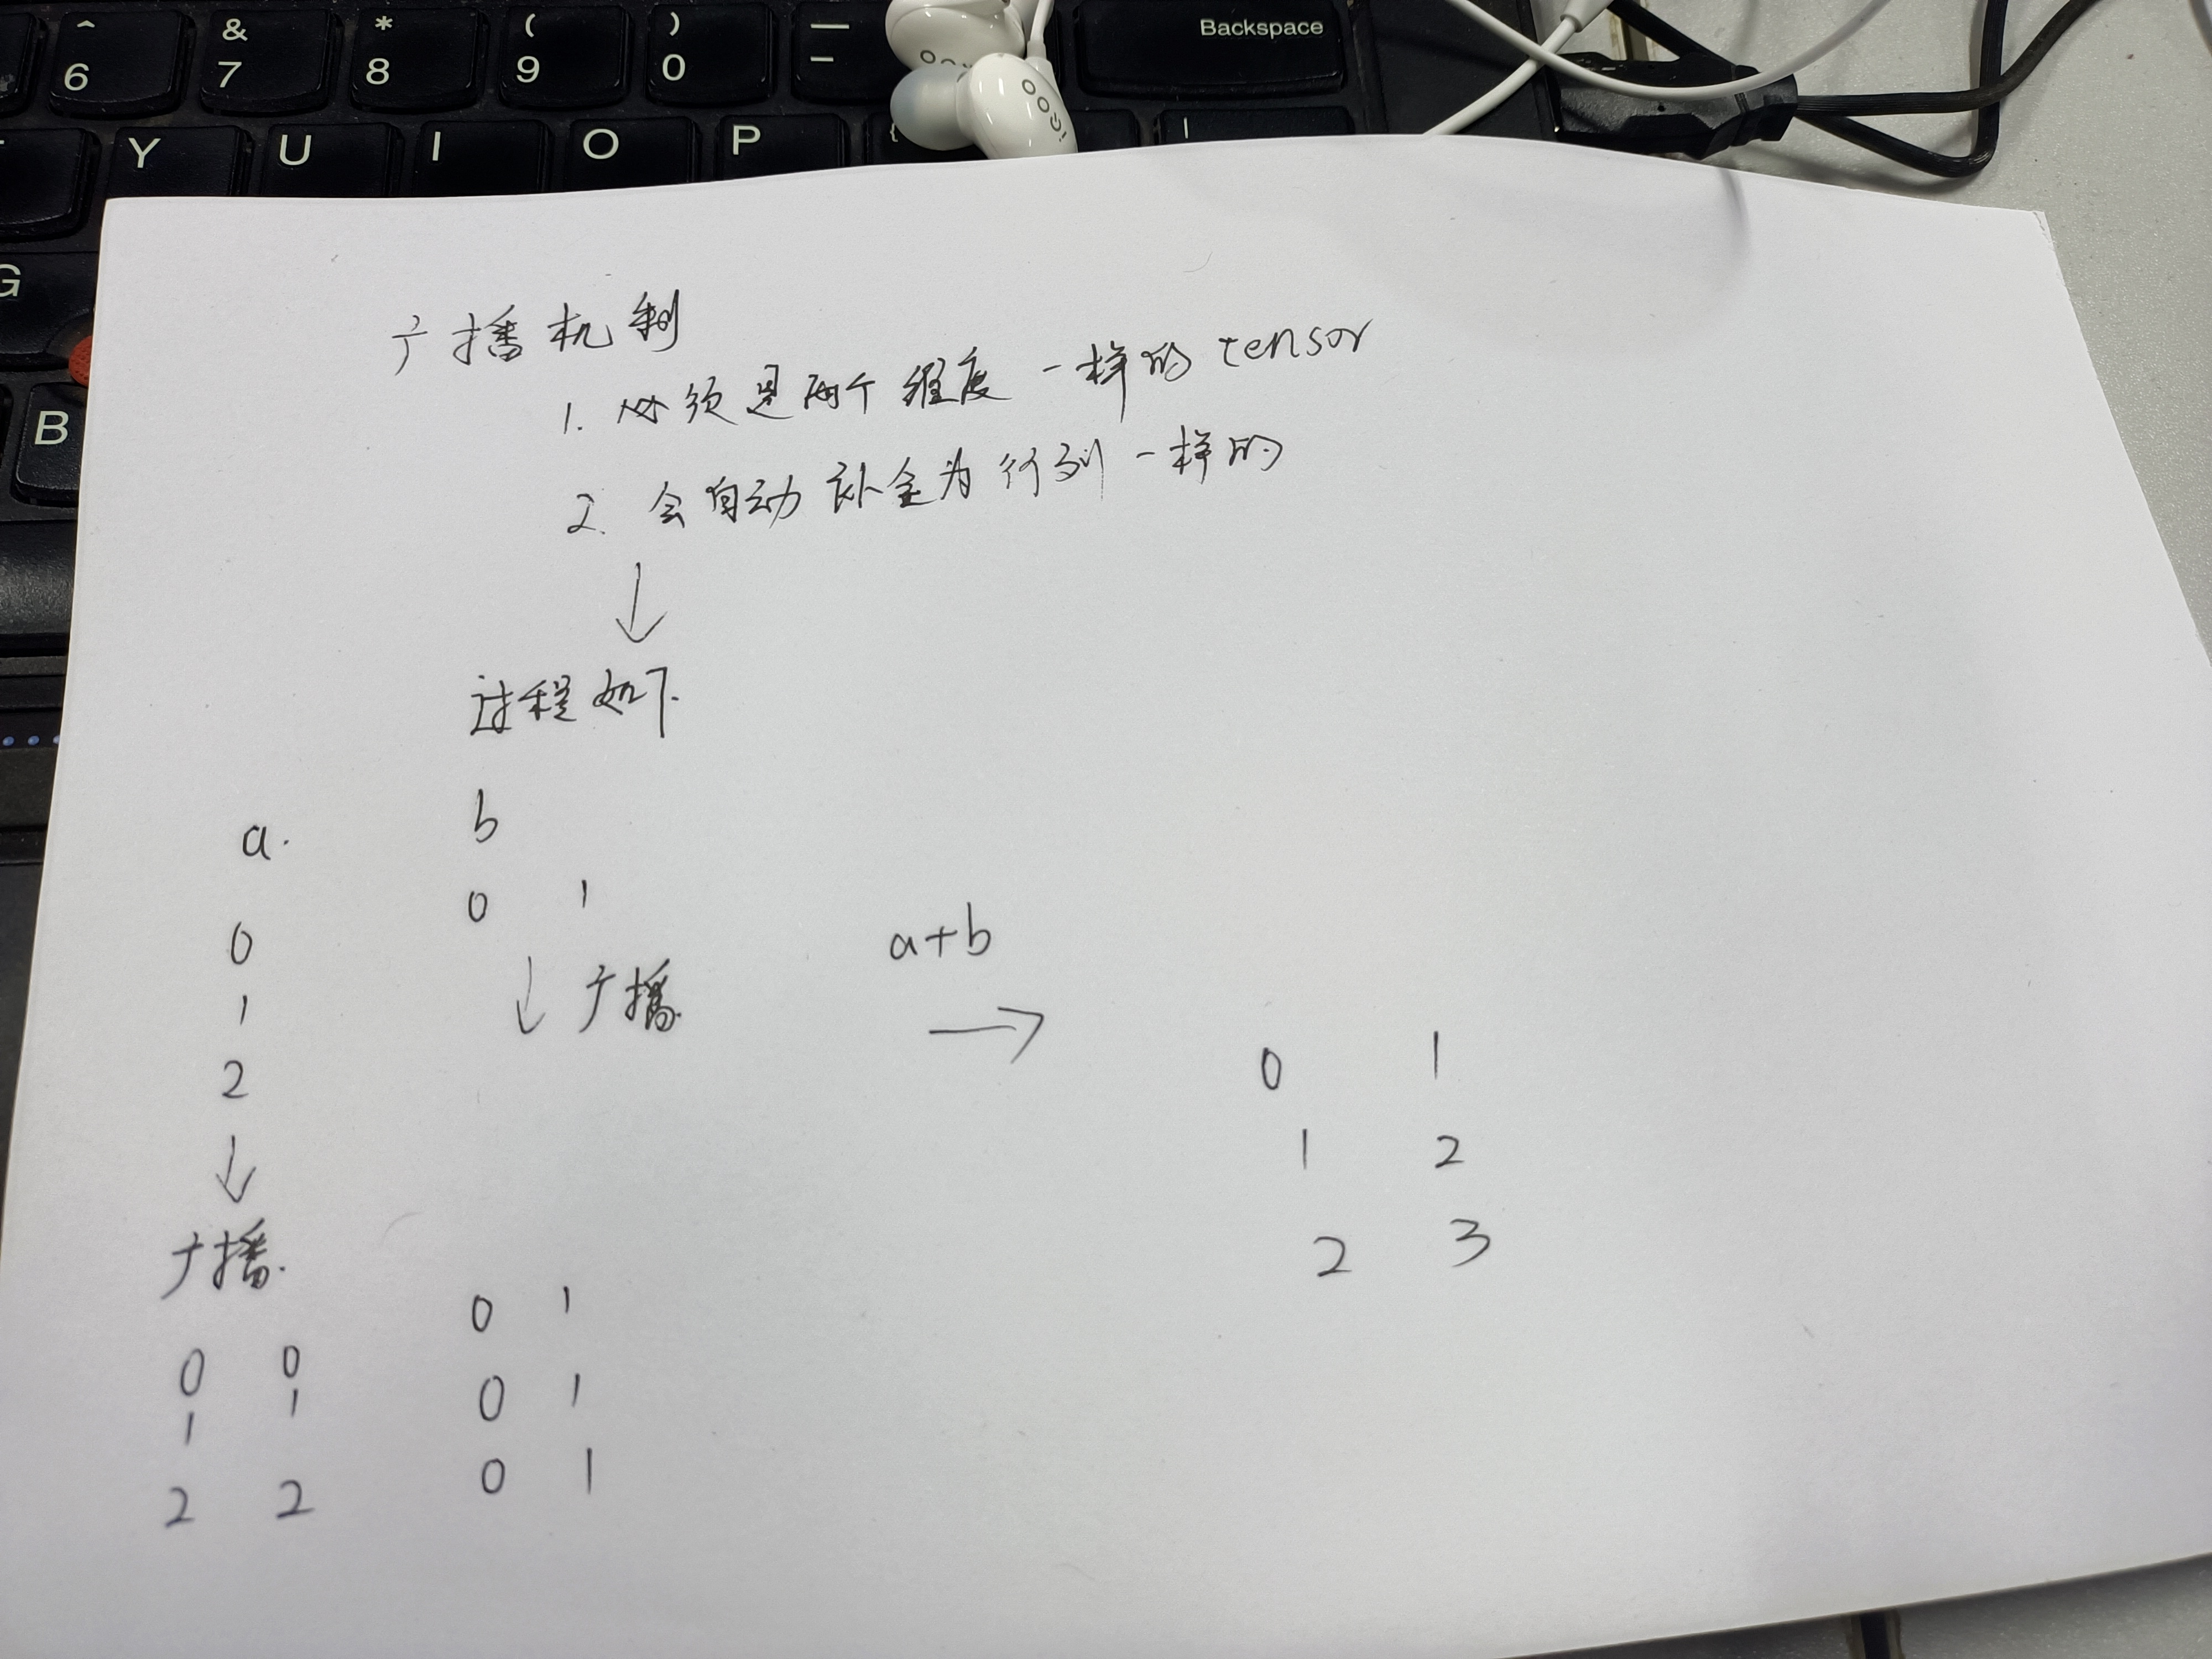
**广播机制慎重，可能会得到意想不到的结果**

In [22]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [23]:
X[-1],X[1:3]#第一行和第二行    左闭右开

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [25]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [27]:
X[1,2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [28]:
X[0:2,:] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [30]:
before  = id(Y)
Y = Y + X
id(Y) == before
#运行一些操作可能会导致为新结果分配内存

False

In [32]:
Z = torch.zeros_like(Y)#原地操作
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))
print('id(Y):', id(Y))

id(Z): 140696439911232
id(Z): 140696439911232
id(Y): 140696439824000


In [34]:
before  = id(X)
X += Y
id(X) == before

True

In [35]:
A = X.numpy()
B = torch.tensor(A)
type(A),type(B)

(numpy.ndarray, torch.Tensor)

In [36]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 数据预处理

In [2]:
import os

os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file = os.path.join('..','data','house_tiny.csv')
with open(data_file,'w') as f:
    f.write("NumRooms,Alley,Prince\n") # 列名
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [3]:
import pandas as pd 
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley  Prince
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [4]:
data

,NumRooms,Alley,Prince
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


**处理缺失数据，插值或者删除**

In [5]:
inputs, outputs = data.iloc[:,0:2],data.iloc[:,2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [6]:
inputs = pd.get_dummies(inputs,dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [7]:
import torch

In [9]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))